In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from citipy import citipy
import requests
from config import weather_api_key
from pprint import pprint
import time

In [2]:
# Create a set of random latitude and longitude combinations
lats = np.random.uniform(-90,90, size=1500)
lngs = np.random.uniform(-180,180, size=1500)
lat_lngs = zip(lats,lngs)
lat_lngs

In [3]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [4]:
# Use the tuple() function to display the latitude and longitude combinations.
for i in coordinates:
    print(i[0], i[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [7]:
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list. Adding enumerate to retrieve both the index and the city from the list
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint url with each city
    city_url = url + '&q=' + city.replace(' ', '+')
    
    # Log the URL, record, and set numbers and the city
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
          
    # Add 1 to the record count
    record_count += 1  
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | thinadhoo
Processing Record 2 of Set 1 | otane
Processing Record 3 of Set 1 | jamestown
Processing Record 4 of Set 1 | clinton
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | atasu
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | mindelo
Processing Record 11 of Set 1 | nadym
Processing Record 12 of Set 1 | maghama
City not found. Skipping...
Processing Record 13 of Set 1 | kapaa
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | zhanatas
City not found. Skipping...
Processing Record 16 of Set 1 | senmonorom
City not found. Skipping...
Processing Record 17 of Set 1 | dzerzhinsk
Processing Record 18 of Set 1 | tabou
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | kochki
Processing Record 21 of Set 1 | kaitangata
Processing Record 22 of Set 1 | norman wells
Pr

Processing Record 40 of Set 4 | severo-kurilsk
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | tulun
Processing Record 43 of Set 4 | mahebourg
Processing Record 44 of Set 4 | pacific grove
Processing Record 45 of Set 4 | tallahassee
Processing Record 46 of Set 4 | kamenskoye
City not found. Skipping...
Processing Record 47 of Set 4 | sibolga
Processing Record 48 of Set 4 | dillon
Processing Record 49 of Set 4 | bambanglipuro
Processing Record 50 of Set 4 | yulara
Processing Record 1 of Set 5 | shingu
Processing Record 2 of Set 5 | cidreira
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | antofagasta
Processing Record 5 of Set 5 | lompoc
Processing Record 6 of Set 5 | nova odesa
Processing Record 7 of Set 5 | ouegoa
Processing Record 8 of Set 5 | rosetta
Processing Record 9 of Set 5 | alofi
Processing Record 10 of Set 5 | asilah
Processing Record 11 of Set 5 | hasaki
Processing Record 12 of Set 5 | acapulco
Processing Record 13 of Set 

Processing Record 32 of Set 8 | yakeshi
Processing Record 33 of Set 8 | san quintin
Processing Record 34 of Set 8 | port hawkesbury
Processing Record 35 of Set 8 | yenagoa
Processing Record 36 of Set 8 | te anau
Processing Record 37 of Set 8 | inongo
Processing Record 38 of Set 8 | vuktyl
Processing Record 39 of Set 8 | salalah
Processing Record 40 of Set 8 | ballina
Processing Record 41 of Set 8 | raga
Processing Record 42 of Set 8 | alyangula
Processing Record 43 of Set 8 | vanavara
Processing Record 44 of Set 8 | perth
Processing Record 45 of Set 8 | kununurra
Processing Record 46 of Set 8 | pombas
Processing Record 47 of Set 8 | warqla
City not found. Skipping...
Processing Record 48 of Set 8 | tekeli
Processing Record 49 of Set 8 | guerrero negro
Processing Record 50 of Set 8 | los llanos de aridane
Processing Record 1 of Set 9 | yaan
Processing Record 2 of Set 9 | avera
Processing Record 3 of Set 9 | lorengau
Processing Record 4 of Set 9 | bur gabo
City not found. Skipping...
Pro

Processing Record 20 of Set 12 | chapais
Processing Record 21 of Set 12 | meadow lake
Processing Record 22 of Set 12 | qafsah
City not found. Skipping...
Processing Record 23 of Set 12 | yeniseysk
Processing Record 24 of Set 12 | abu dhabi
Processing Record 25 of Set 12 | ust-kulom
Processing Record 26 of Set 12 | broken hill
Processing Record 27 of Set 12 | kidal
Processing Record 28 of Set 12 | lumphat
Processing Record 29 of Set 12 | winnemucca
Processing Record 30 of Set 12 | mattru
Processing Record 31 of Set 12 | salina
Processing Record 32 of Set 12 | pochutla
Processing Record 33 of Set 12 | mahuva
Processing Record 34 of Set 12 | ust-tsilma
Processing Record 35 of Set 12 | oksfjord
Processing Record 36 of Set 12 | vila franca do campo
Processing Record 37 of Set 12 | mutoko
Processing Record 38 of Set 12 | bijie
Processing Record 39 of Set 12 | mount gambier
Processing Record 40 of Set 12 | villa bruzual
Processing Record 41 of Set 12 | den helder
Processing Record 42 of Set 1

In [10]:
city_data

[{'City': 'Thinadhoo',
  'Lat': 0.5333,
  'Lng': 72.9333,
  'Max Temp': 81.72,
  'Humidity': 71,
  'Cloudiness': 99,
  'Wind Speed': 10.36,
  'Country': 'MV',
  'Date': '2021-01-28 21:15:20'},
 {'City': 'Otane',
  'Lat': -39.8833,
  'Lng': 176.6333,
  'Max Temp': 55.99,
  'Humidity': 77,
  'Cloudiness': 99,
  'Wind Speed': 10.54,
  'Country': 'NZ',
  'Date': '2021-01-28 21:15:20'},
 {'City': 'Jamestown',
  'Lat': 42.097,
  'Lng': -79.2353,
  'Max Temp': 19,
  'Humidity': 79,
  'Cloudiness': 90,
  'Wind Speed': 11.5,
  'Country': 'US',
  'Date': '2021-01-28 21:15:20'},
 {'City': 'Clinton',
  'Lat': 42.587,
  'Lng': -82.9199,
  'Max Temp': 24.01,
  'Humidity': 58,
  'Cloudiness': 90,
  'Wind Speed': 12.66,
  'Country': 'US',
  'Date': '2021-01-28 21:15:20'},
 {'City': 'Lebu',
  'Lat': -37.6167,
  'Lng': -73.65,
  'Max Temp': 59.13,
  'Humidity': 91,
  'Cloudiness': 100,
  'Wind Speed': 8.03,
  'Country': 'CL',
  'Date': '2021-01-28 21:15:20'},
 {'City': 'Coquimbo',
  'Lat': -29.9533,
  '

In [11]:
len(city_data)

561

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thinadhoo,0.5333,72.9333,81.72,71,99,10.36,MV,2021-01-28 21:15:20
1,Otane,-39.8833,176.6333,55.99,77,99,10.54,NZ,2021-01-28 21:15:20
2,Jamestown,42.0970,-79.2353,19.00,79,90,11.50,US,2021-01-28 21:15:20
3,Clinton,42.5870,-82.9199,24.01,58,90,12.66,US,2021-01-28 21:15:20
4,Lebu,-37.6167,-73.6500,59.13,91,100,8.03,CL,2021-01-28 21:15:20
5,Coquimbo,-29.9533,-71.3436,68.00,68,0,12.66,CL,2021-01-28 21:15:20
6,Albany,42.6001,-73.9662,21.00,48,29,5.99,US,2021-01-28 21:15:21
7,Atasu,48.6814,71.6433,16.09,88,0,3.98,KZ,2021-01-28 21:15:21
8,Hermanus,-34.4187,19.2345,57.00,87,22,5.66,ZA,2021-01-28 21:15:21
9,Mindelo,16.8901,-24.9804,71.60,78,20,18.41,CV,2021-01-28 21:15:21


In [13]:
# New column order
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [14]:
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thinadhoo,MV,2021-01-28 21:15:20,0.5333,72.9333,81.72,71,99,10.36
1,Otane,NZ,2021-01-28 21:15:20,-39.8833,176.6333,55.99,77,99,10.54
2,Jamestown,US,2021-01-28 21:15:20,42.0970,-79.2353,19.00,79,90,11.50
3,Clinton,US,2021-01-28 21:15:20,42.5870,-82.9199,24.01,58,90,12.66
4,Lebu,CL,2021-01-28 21:15:20,-37.6167,-73.6500,59.13,91,100,8.03
5,Coquimbo,CL,2021-01-28 21:15:20,-29.9533,-71.3436,68.00,68,0,12.66
6,Albany,US,2021-01-28 21:15:21,42.6001,-73.9662,21.00,48,29,5.99
7,Atasu,KZ,2021-01-28 21:15:21,48.6814,71.6433,16.09,88,0,3.98
8,Hermanus,ZA,2021-01-28 21:15:21,-34.4187,19.2345,57.00,87,22,5.66
9,Mindelo,CV,2021-01-28 21:15:21,16.8901,-24.9804,71.60,78,20,18.41


In [15]:
# Create the output file (CSV)
output_data_file = 'weather_data/cities.csv'

# Export the city_data into a csv
city_data_df.to_csv(output_data_file, index_label='City_ID')

In [16]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Get Today's date in seconds
today = time.time()
today

1611868601.4300132

In [18]:
today = time.strftime('%x')
today

'01/28/21'

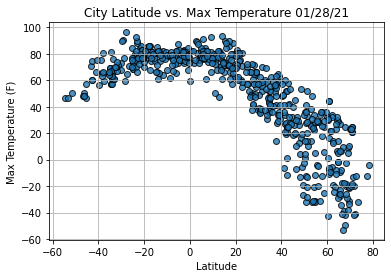

In [26]:
# Build the scatter plt for lat vs max temp
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.ylabel("Max Temperature (F)")
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.grid(True)

plt.savefig('weather_data/Fig1.png')
plt.show()

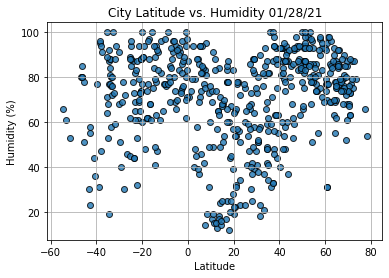

In [27]:
# Build the scatter plt for lat vs humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.ylabel("Humidity (%)")
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Humidity ' + time.strftime('%x'))
plt.grid(True)

plt.savefig('weather_data/Fig2.png')
plt.show()

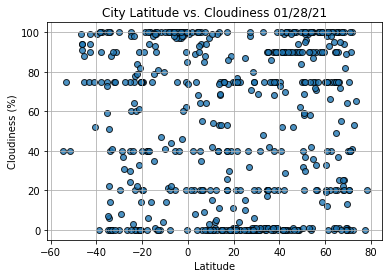

In [28]:
# Build the scatter plt for lat vs cloudiness
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Cloudiness ' + time.strftime('%x'))
plt.grid(True)

plt.savefig('weather_data/Fig3.png')
plt.show()

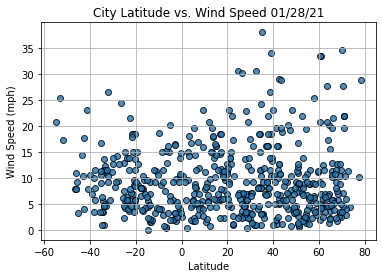

In [29]:
# Build the scatter plt for lat vs wind_speed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel('Latitude')
plt.title(f'City Latitude vs. Wind Speed ' + time.strftime('%x'))
plt.grid(True)

plt.savefig('weather_data/Fig4.png')
plt.show()

In [55]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (text_coordinates), fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [56]:
index13 = city_data_df.loc[13]
index13

City                   Dzerzhinsk
Country                        RU
Date          2021-01-28 21:13:27
Lat                       56.2389
Lng                       43.4631
Max Temp                     28.4
Humidity                       74
Cloudiness                     20
Wind Speed                   8.95
Name: 13, dtype: object

In [57]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

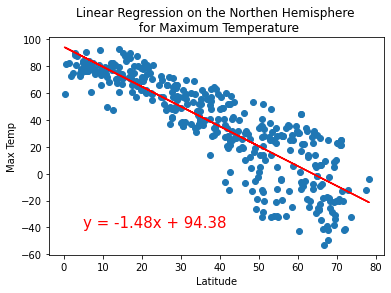

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Northen Hemisphere \n for Maximum Temperature', 'Max Temp', (5,-40))

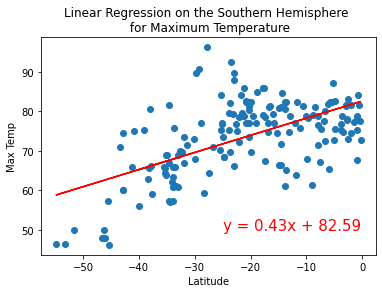

In [64]:
# Linear Regression on the Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp', (-25,50))

In [67]:
print(linregress(x_values, y_values))

LinregressResult(slope=-1.478978638260637, intercept=94.3839919689943, rvalue=-0.8599328052789448, pvalue=4.332765242417824e-115, stderr=0.044622997928031)


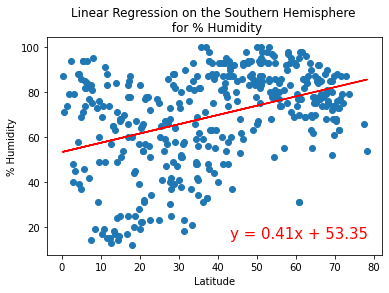

In [73]:
# Linear Regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values,
                      'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (43,15))

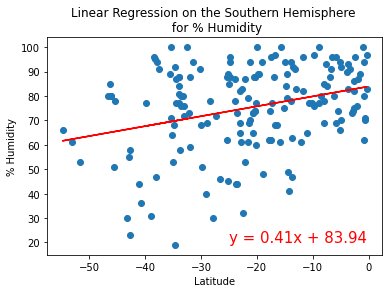

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-25,20))

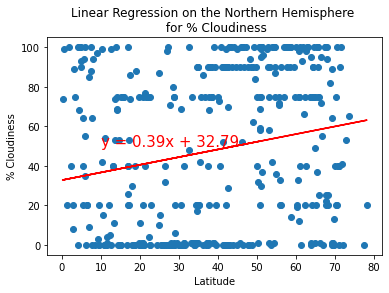

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
#Call the Function
plot_linear_regression(x_values, y_values, 
                      'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness', (10,50))

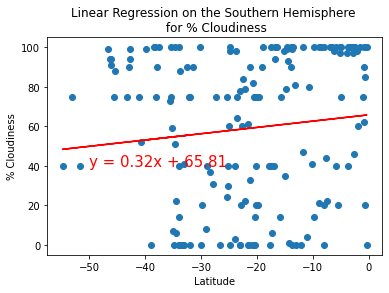

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,40))

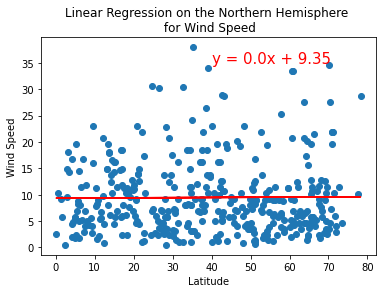

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

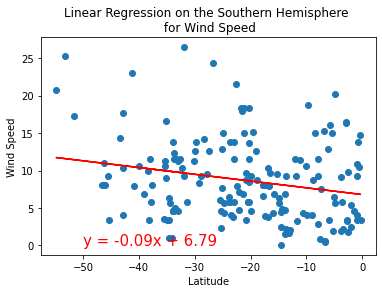

In [87]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,0))